In [2]:
# Linear Regression Models to Predict Maximum Heart Rate (thalach)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("heart.csv")

# Inspect dataset (optional)
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
print("\n--- Simple Linear Regression ---")

# Independent variable (age) and dependent variable (thalach)
X = df[['age']]  # 2D array
y = df['thalach']

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Results
slope = lin_reg.coef_[0]
intercept = lin_reg.intercept_
mse_a = mean_squared_error(y_test, y_pred)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"Mean Squared Error (MSE): {mse_a:.4f}")


--- Simple Linear Regression ---
Slope: -0.9626
Intercept: 202.5401
Mean Squared Error (MSE): 523.4017


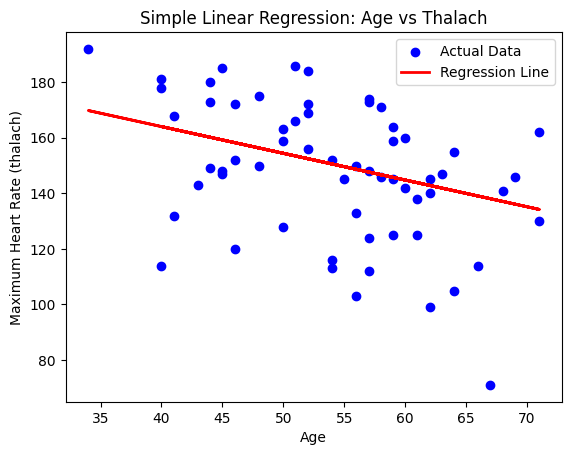

In [4]:
# Plot regression line
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.title("Simple Linear Regression: Age vs Thalach")
plt.legend()
plt.show()

In [5]:
print("\n--- Multiple Linear Regression (age, trestbps, chol) ---")

features_case1 = ['age', 'trestbps', 'chol']
X1 = df[features_case1]
y = df['thalach']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

multi_reg1 = LinearRegression()
multi_reg1.fit(X1_train, y_train)
y_pred1 = multi_reg1.predict(X1_test)

coefficients_case1 = dict(zip(features_case1, multi_reg1.coef_))
intercept_case1 = multi_reg1.intercept_
mse_b = mean_squared_error(y_test, y_pred1)

print("Coefficients:", coefficients_case1)
print(f"Intercept: {intercept_case1:.4f}")
print(f"Mean Squared Error (MSE): {mse_b:.4f}")



--- Multiple Linear Regression (age, trestbps, chol) ---
Coefficients: {'age': np.float64(-1.0719201184212748), 'trestbps': np.float64(0.09671538786968824), 'chol': np.float64(0.044286205168628925)}
Intercept: 184.9560
Mean Squared Error (MSE): 532.9076


In [6]:
print("\n--- Multiple Linear Regression (age, trestbps, chol, sex, cp, fbs, exang) ---")

features_case2 = ['age', 'trestbps', 'chol', 'sex', 'cp', 'fbs', 'exang']
X2 = df[features_case2]
y = df['thalach']

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

multi_reg2 = LinearRegression()
multi_reg2.fit(X2_train, y_train)
y_pred2 = multi_reg2.predict(X2_test)

coefficients_case2 = dict(zip(features_case2, multi_reg2.coef_))
intercept_case2 = multi_reg2.intercept_
mse_c = mean_squared_error(y_test, y_pred2)

print("Coefficients:", coefficients_case2)
print(f"Intercept: {intercept_case2:.4f}")
print(f"Mean Squared Error (MSE): {mse_c:.4f}")


--- Multiple Linear Regression (age, trestbps, chol, sex, cp, fbs, exang) ---
Coefficients: {'age': np.float64(-0.9299435735256864), 'trestbps': np.float64(0.08928759022239152), 'chol': np.float64(0.049610900974765476), 'sex': np.float64(0.5435670010216618), 'cp': np.float64(3.2738338476647595), 'fbs': np.float64(0.4619471264848983), 'exang': np.float64(-14.306283369921267)}
Intercept: 177.7072
Mean Squared Error (MSE): 436.3587


In [7]:
print("\n--- Comparison & Inference ---")
print(f"PART A MSE (Simple Regression): {mse_a:.4f}")
print(f"PART B MSE (3 features): {mse_b:.4f}")
print(f"PART C MSE (7 features): {mse_c:.4f}")

if mse_c < mse_b and mse_c < mse_a:
    best_model = "Multiple Linear Regression (Case 2 with 7 features)"
elif mse_b < mse_a:
    best_model = "Multiple Linear Regression (Case 1 with 3 features)"
else:
    best_model = "Simple Linear Regression (Age only)"

print(f"\nBest Model: {best_model}")
print("\nReflection:")
print("- Adding more features generally reduced MSE, meaning better prediction accuracy.")
print("- The model with more clinical features (Case 2) performed best, showing that considering multiple health factors improves predictions.")
print("- These regression models can help in early risk detection by identifying abnormal heart rates relative to age and other clinical measures.")


--- Comparison & Inference ---
PART A MSE (Simple Regression): 523.4017
PART B MSE (3 features): 532.9076
PART C MSE (7 features): 436.3587

Best Model: Multiple Linear Regression (Case 2 with 7 features)

Reflection:
- Adding more features generally reduced MSE, meaning better prediction accuracy.
- The model with more clinical features (Case 2) performed best, showing that considering multiple health factors improves predictions.
- These regression models can help in early risk detection by identifying abnormal heart rates relative to age and other clinical measures.
